In [70]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
@author: omayr
@description: POC: Exploratody Analysis of CampusKlubi Sensor Data
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os import path
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))
    printmd('**bold**')
    

def read_file():
    
    p = str(path.dirname(path.abspath("__file__")))+"/data/sample/"
    files = [f for f in listdir(p) if path.isfile(path.join(p,f))]
    cols = ['utc_org_rec_time']
    cols.extend([x.split('.')[0] for x in files])
    data = pd.DataFrame()
    
    for file in files:
        temp = pd.read_csv("data/sample/"+file)
        data = pd.concat((data,temp[['value']]),axis=1)

    data = pd.concat((temp[['utc_org_rec_time']],data),axis=1)

    data['utc_org_rec_time'] = temp['utc_org_rec_time']
    data['utc_org_rec_time'] = pd.to_datetime(data['utc_org_rec_time'])
    data['utc_org_rec_time'] = pd.DatetimeIndex(data['utc_org_rec_time'])
    
    data.columns = ['time', 'ACS', 'AQ', 'ART', 'CS', 'CV', 'EAT', 'HV', 'PI', 'RT', 'STATUS']
    
    return data

# Sensor Abbreviation Legend
ACS : Airflow Cooling Setpoint <br />
AQ   : Air Quality <br />
ART  : Average Room Temperature <br />
CS   : Cooling Setpoint <br />
CV   : Cooling Valve <br />
EAT  : Exhaust Air Temperature <br />
HV   : Heating Valve <br />
PI   : Presence Information <br />
RT   : Room Temperature <br />

               ACS           AQ          ART           CS           CV  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     24.980260    10.148400    21.327598    22.045188     2.537988   
std       0.269605     3.286539     0.417590     0.223027    12.085961   
min      20.700000     0.000000    20.810000    22.000000     0.000000   
25%      25.000000     8.000000    21.000000    22.000000     0.000000   
50%      25.000000     9.000000    21.160000    22.000000     0.000000   
75%      25.000000    11.000000    21.560000    22.000000     0.000000   
max      25.000000    51.000000    22.660000    24.100000   100.000000   

               EAT           HV           PI           RT       STATUS  
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000  
mean     21.326880     8.771218     0.201600    21.327598     0.201600  
std       0.771044    12.191854     0.401235     0.417590     0.401235  
min       0.000000     0.000000     0.000

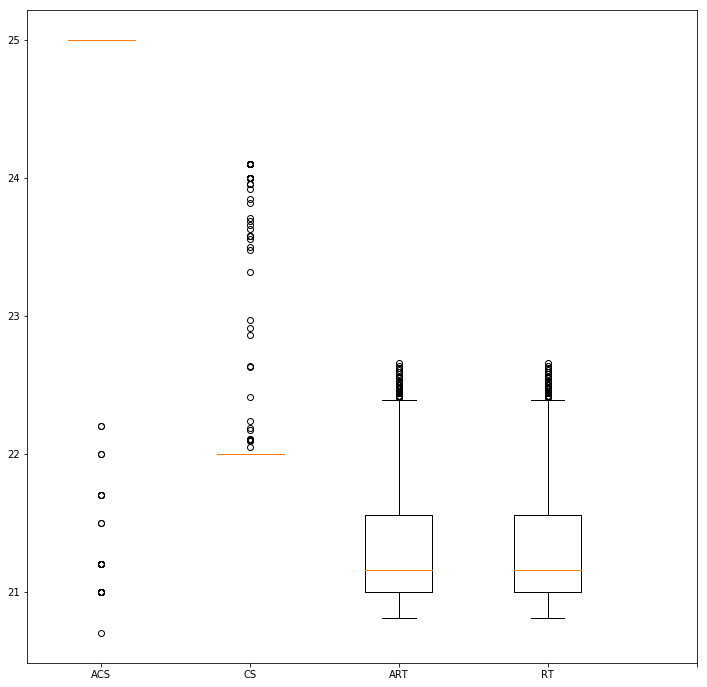

In [78]:
def basic_stats():

    data = read_file()
    print data.describe()
    
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
    ax.boxplot(np.array(data[['ACS','CS','ART','RT']]))
    plt.xticks([1, 2, 3, 4, 5], ['ACS', 'CS', 'ART', 'RT'])
    plt.show()
   
basic_stats()

             ACS        AQ       ART        CS        CV       EAT        HV  \
ACS     1.000000 -0.066973 -0.141316 -0.017998 -0.590555 -0.092310  0.052686   
AQ     -0.066973  1.000000  0.474411  0.106075  0.335720  0.408118 -0.255684   
ART    -0.141316  0.474411  1.000000  0.203085  0.414979  0.694713 -0.580702   
CS     -0.017998  0.106075  0.203085  1.000000  0.051948  0.129325 -0.145225   
CV     -0.590555  0.335720  0.414979  0.051948  1.000000  0.297652 -0.151107   
EAT    -0.092310  0.408118  0.694713  0.129325  0.297652  1.000000 -0.377514   
HV      0.052686 -0.255684 -0.580702 -0.145225 -0.151107 -0.377514  1.000000   
PI     -0.145723  0.444992  0.805919  0.274445  0.417943  0.569339 -0.358381   
RT     -0.141316  0.474411  1.000000  0.203085  0.414979  0.694713 -0.580702   
STATUS -0.145723  0.444992  0.805919  0.274445  0.417943  0.569339 -0.358381   

              PI        RT    STATUS  
ACS    -0.145723 -0.141316 -0.145723  
AQ      0.444992  0.474411  0.444992  
AR

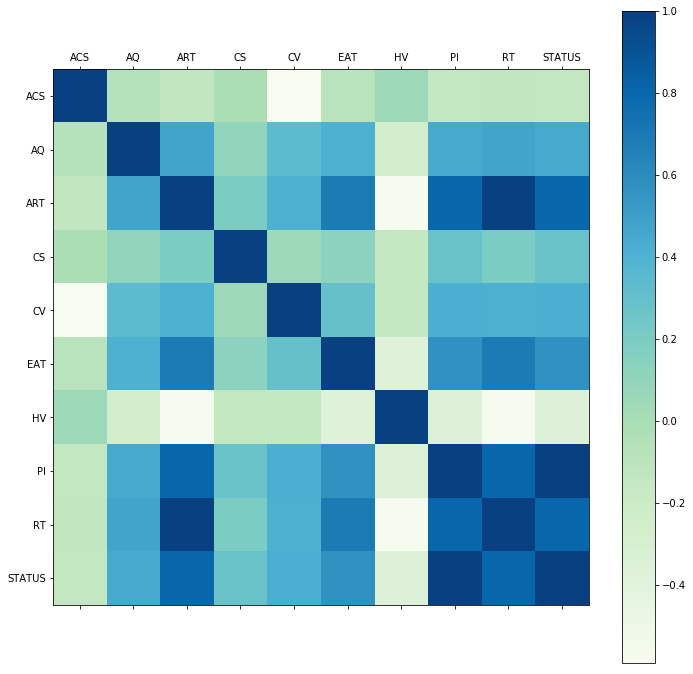

In [75]:
def visualize_corr():

    data = read_file()
    cd = data.corr()
    print cd
    
    cols = list(data.columns)
    cols.remove('time')
    
    #plt.matshow(data.corr(),aspect = 'auto')
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
    cax = ax.matshow(data.corr(), interpolation='nearest', cmap='GnBu')
    fig.colorbar(cax)
    plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], cols)
    plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], cols)
    
    plt.show()
    
visualize_corr()